In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
### Decision Tree example ###
df = pd.read_csv('/smoke_detection_iot.csv')

In [4]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
# Spliting the data
x = df.drop(['Unnamed: 0', 'UTC', 'Fire Alarm'], axis = 1).values
y = df['Fire Alarm'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

**Criterion**:  *Here we specify which method we will choose when performing split operations*

**Splitter**: *It is the strategy of how to split a node*

**max_features**: *The number of features to consider when splitting*

**max_depth**: *It determines the maximum depth of the tree*

**min_samples_split**: *It determines the minimum number of samples an internal node must have before it can be split*

**min_samples_leaf**: *It determines the minimum number of samples an external node (leaf) must have. Practically keep it between 1 to 20*



In [ ]:
parameters = {'criterion' :['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_features': [None, 13, 8, 7, 'auto','sqrt','log2'],
              'max_depth': [None, 10,5],
              'min_samples_split': [2, 10, 5],
              'min_samples_leaf': [1,3,5]}


grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5)
grid.fit(x_train, y_train)

In [21]:
print('best score of training: ', round(model.best_score_,4))

print('\nbest parameters: \n', model.best_params_)

best score of training:  0.9999

best parameters: 
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}


In [22]:
model = grid.best_estimator_

In [27]:
predictions = model.predict(x_test)
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[ 5965,     4],
       [    0, 14699]])

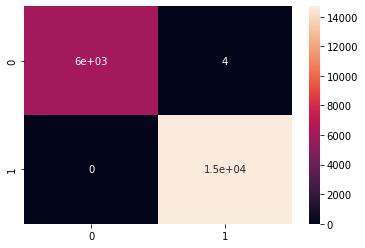

In [29]:
sns.heatmap(confusion_matrix, annot = True)

In [30]:
accuracy_score(y_test, predictions)

0.9998064640990904

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5969
           1       1.00      1.00      1.00     14699

    accuracy                           1.00     20668
   macro avg       1.00      1.00      1.00     20668
weighted avg       1.00      1.00      1.00     20668



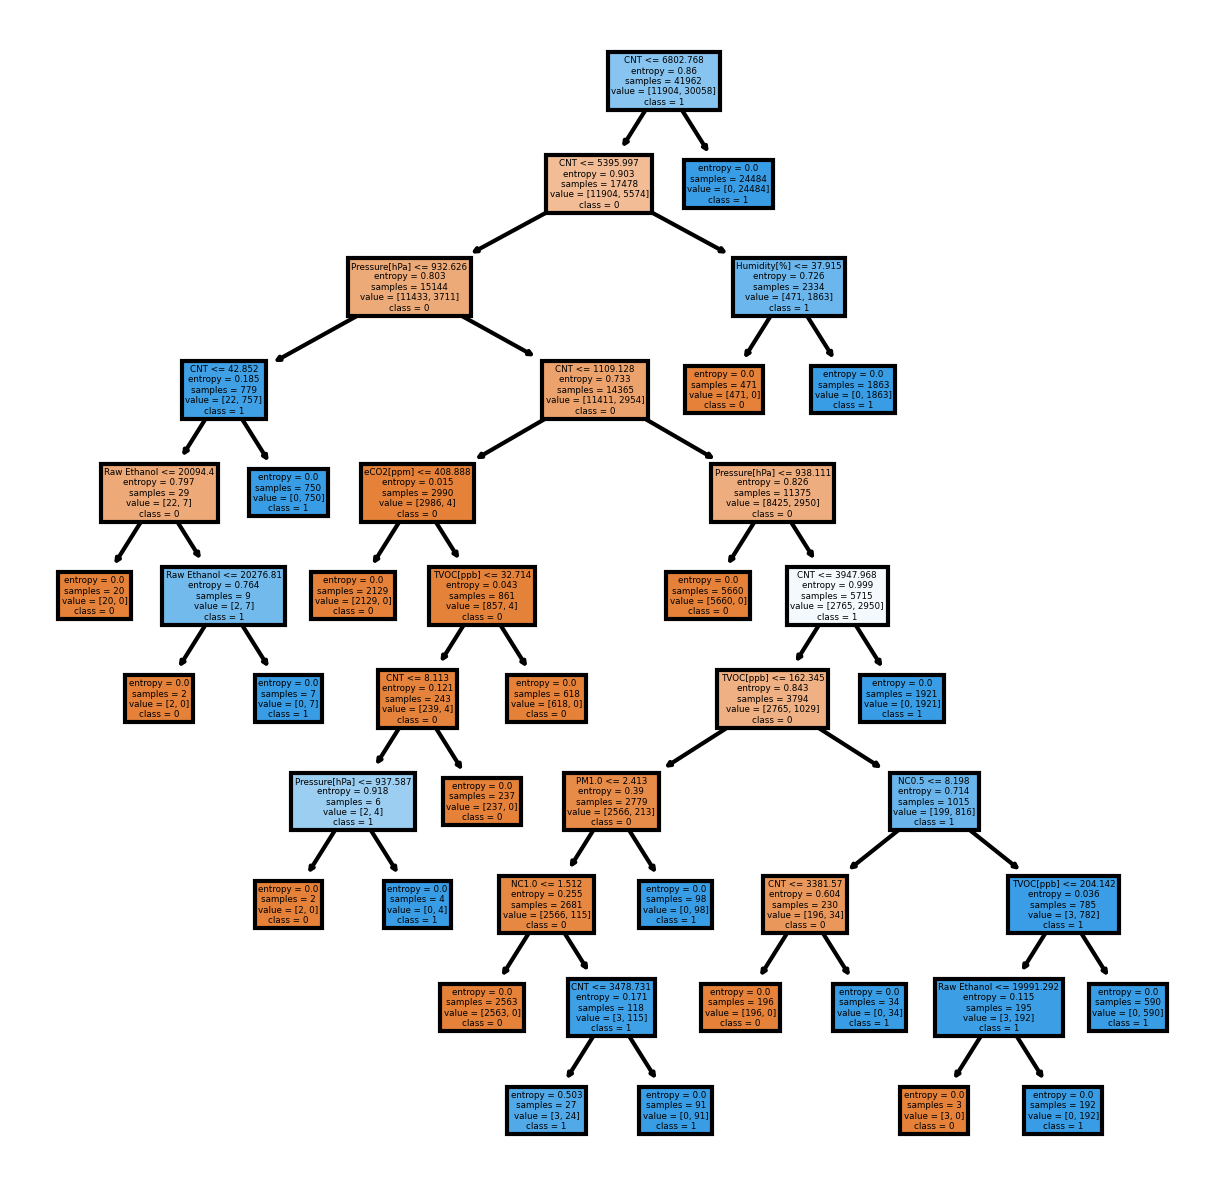

In [52]:
from sklearn import tree
features=['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT']
classes= ['0', '1']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = features, 
               class_names=classes,
               filled = True);
#fig.savefig('imagename.png')

In [70]:
# feature importance 
model.feature_importances_

array([0.00000000e+00, 4.69181265e-02, 3.88823112e-02, 1.99321242e-04,
       0.00000000e+00, 1.26024620e-03, 1.43481669e-01, 1.10761187e-02,
       0.00000000e+00, 1.54403387e-02, 1.84139278e-02, 0.00000000e+00,
       7.24327941e-01])

In [71]:
# feature importance in the DataFrame
fi = [round(i * 100, 2) for i in model.feature_importances_]
dataframe = {'feature': df.drop(['Unnamed: 0', 'UTC', 'Fire Alarm'], axis = 1).columns, 
             'information_gain': fi}
feature_importance_df = pd.DataFrame(dataframe)

In [72]:
feature_importance_df.sort_values('information_gain', ascending = False)

,feature,information_gain
12,CNT,72.43
6,Pressure[hPa],14.35
1,Humidity[%],4.69
2,TVOC[ppb],3.89
10,NC1.0,1.84
9,NC0.5,1.54
7,PM1.0,1.11
5,Raw Ethanol,0.13
3,eCO2[ppm],0.02
0,Temperature[C],0.00
